In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy
from astropy.io import fits
from astropy.table import Table

import itertools

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
#data for the HR diagram
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")
data_stars=Table.read("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv")

In [3]:
data_stars[0:5]

Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
int64,float64,float64,float64,str13,str18,str1
3068,0.0024,0.17,16.12,Brown Dwarf,Red,M
3042,0.0005,0.1542,16.6,Brown Dwarf,Red,M
2600,0.0003,0.102,18.7,Brown Dwarf,Red,M
2800,0.0002,0.16,16.65,Brown Dwarf,Red,M
1939,0.000138,0.10300000000000001,20.06,Brown Dwarf,Red,M


In [4]:
le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
data_stars['Star type'] = le.fit_transform(data_stars['Star type'])
label_names=['Brown Dwarf', 'Hypergiant', 'Main Sequence', 'Red Dwarf', 'Supergiant','White Dwarf']
labels = le.inverse_transform(data_stars['Star type'])
class_names = le.classes_
print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


In [5]:
le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
data_stars['Star type'] = le.fit_transform(data_stars['Star type'])
labels = le.inverse_transform(data_stars['Star type'])
class_names = le.classes_
print(class_names)

[0 1 2 3 4 5]


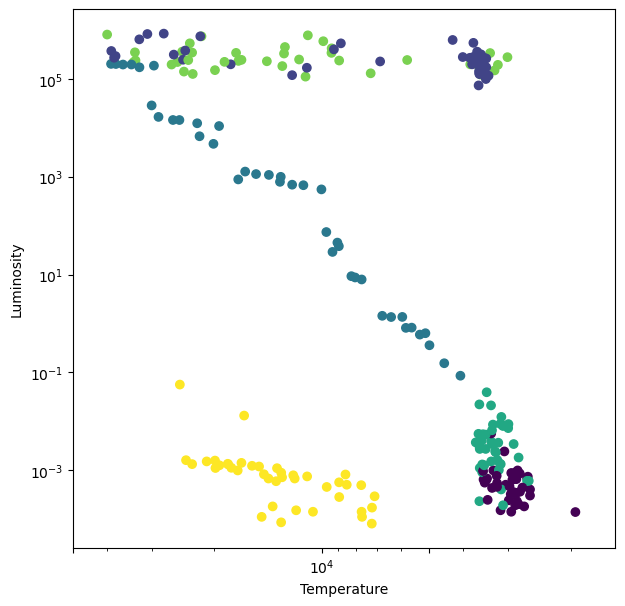

In [6]:
#HR diagram
fig = plt.figure(figsize=(7, 7))
plt.scatter(data=data_stars, x='Temperature (K)', y='Luminosity(L/Lo)', c=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.xlabel('Temperature')
plt.ylabel('Luminosity')
plt.show()

In [7]:
#save only data in array
data_array = np.array([data_stars[col].data for col in data_stars.colnames])
print('Shape of the initial data:', data_array.shape)

#reshape the data: last 2 features are names => not used + transpose matrix for right shape
data_array=(data_array[:][0:-2]).T
print('Shape of the reshaped data:', data_array.shape)

#remove nan and make all in numbers
data_array = np.nan_to_num(data_array)
data_array=np.array(data_array, dtype=np.float64)
print('\nPrint of the some new data:\n', data_array[0:5])

Shape of the initial data: (7, 240)
Shape of the reshaped data: (240, 5)

Print of the some new data:
 [[3.068e+03 2.400e-03 1.700e-01 1.612e+01 0.000e+00]
 [3.042e+03 5.000e-04 1.542e-01 1.660e+01 0.000e+00]
 [2.600e+03 3.000e-04 1.020e-01 1.870e+01 0.000e+00]
 [2.800e+03 2.000e-04 1.600e-01 1.665e+01 0.000e+00]
 [1.939e+03 1.380e-04 1.030e-01 2.006e+01 0.000e+00]]


In [8]:
#Compute PCA
np.random.seed(500)
nrows_tot = len(data_array)

n_components_tot = 5 #Do fit with 5 components (mean plus 4)
ind_tot = np.random.randint(len(data_array), size=nrows_tot)
pca_tot = PCA(n_components_tot, svd_solver='randomized')
pca_tot.fit_transform(data_array[ind_tot])

evals_tot = pca_tot.explained_variance_ratio_ 
print('Expained fractional variance of data encapsulated in the eigenvalues: \n' + str(evals_tot))

eigenvalues_tot = pca_tot.transform(data_array) #compute the eigenvalues for each of the samples
print('Eigenvalues:\n'+str(eigenvalues_tot[0:3]))
mean_tot = pca_tot.mean_ # mean of the data
print('Mean:\n'+str(mean_tot))
eigenvectors_tot = pca_tot.components_ #compute the eigenvectors for each of the samples
print('Eigenvectors:\n'+str(eigenvectors_tot[0:3]))

Expained fractional variance of data encapsulated in the eigenvalues: 
[9.97781985e-01 2.21342917e-03 4.58496391e-06 1.30427489e-09
 6.11573460e-11]
Eigenvalues:
[[-1.02712688e+05 -5.85095168e+03  1.08193398e+02 -5.74421430e+00
  -2.04887972e+00]
 [-1.02713156e+05 -5.87694606e+03  1.08477694e+02 -6.21628416e+00
  -2.02995380e+00]
 [-1.02721084e+05 -6.31885184e+03  1.13053643e+02 -8.18715654e+00
  -1.93082137e+00]]
Mean:
[1.07610583e+04 1.02590941e+05 2.40115052e+02 4.61237083e+00
 2.45000000e+00]
Eigenvectors:
[[ 1.79359591e-02  9.99837395e-01  1.86642821e-03 -3.74512108e-05
  -9.54527562e-07]
 [ 9.99787037e-01 -1.79159495e-02 -1.02394712e-02 -2.16716356e-04
   7.36255348e-05]
 [-1.02027615e-02  2.04986619e-03 -9.99922347e-01  6.72961407e-03
   1.30885972e-03]]


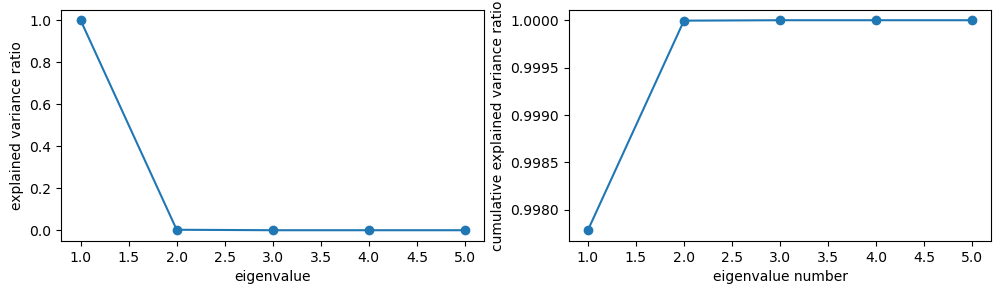

In [9]:
# Plot the results
fig = plt.figure(figsize=(12, 3))

ax = fig.add_subplot(121)
ax.plot(np.arange(1,n_components_tot+1), evals_tot)
ax.scatter(np.arange(1,n_components_tot+1), evals_tot)
ax.set_xlabel("eigenvalue")
ax.set_ylabel("explained variance ratio")

#how much comulative information the eighenvalues give
ax = fig.add_subplot(122)
ax.plot(np.arange(1,n_components_tot+1), evals_tot.cumsum())
ax.scatter(np.arange(1,n_components_tot+1), evals_tot.cumsum())
ax.set_xlabel("eigenvalue number")
ax.set_ylabel("cumulative explained variance ratio")

plt.show()

In [10]:
#Compute PCA
np.random.seed(500)
nrows_2 = len(data_array)

n_components_2 = 2 #Do fit with 2 components
ind_2 = np.random.randint(len(data_array), size=nrows_2)
pca_2 = PCA(n_components_2, svd_solver='randomized')
pca_2.fit_transform(data_array[ind_2])

evals_2 = pca_2.explained_variance_ratio_ 
print('Expained fractional variance of data encapsulated in the eigenvalues: \n' + str(evals_2))

eigenvalues_2 = pca_2.transform(data_array) #compute the eigenvalues for each of the samples
print('Eigenvalues:\n'+str(eigenvalues_2[0:3]))
mean_2 = pca_2.mean_ # mean of the data
print('Mean:\n'+str(mean_2))
eigenvectors_2 = pca_2.components_ #compute the eigenvectors for each of the samples
print('Eigenvectors:\n'+str(eigenvectors_2[0:3]))

Expained fractional variance of data encapsulated in the eigenvalues: 
[0.99778198 0.00221343]
Eigenvalues:
[[-102712.6876563    -5850.951684  ]
 [-102713.1559384    -5876.94605516]
 [-102721.08400838   -6318.85184259]]
Mean:
[1.07610583e+04 1.02590941e+05 2.40115052e+02 4.61237083e+00
 2.45000000e+00]
Eigenvectors:
[[ 1.79359591e-02  9.99837395e-01  1.86642821e-03 -3.74512108e-05
  -9.54527562e-07]
 [ 9.99787037e-01 -1.79159495e-02 -1.02394712e-02 -2.16716356e-04
   7.36255348e-05]]


In [11]:
#transpose the eigenvectors to have the right shape for scalar product
eigenvectors_T_2=np.transpose(eigenvectors_2)
eigenvectors_T_2=np.array(eigenvectors_T_2, dtype=np.float64)

#projection coefficients
coeff_2 = np.dot(data_array, eigenvectors_T_2)

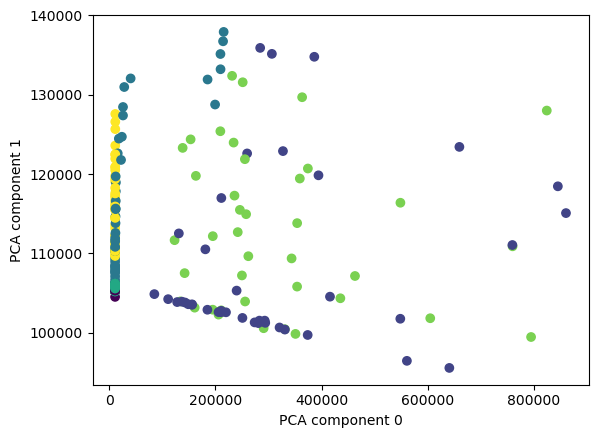

In [12]:
#plot for the 2 projection data from PCA
plt.scatter(mean_2[0] + coeff_2[:,0], mean_2[1] + coeff_2[:,1], c=labels)
plt.xlabel('PCA component 0')
plt.ylabel('PCA component 1')
plt.show()

In [13]:
#reshape of the data = normalizing to mean = 0 and variance = 1
data_better=np.zeros((len(data_array),len(data_array[0])))

for i in range(len(data_array[0])):
    data_better[:,i]=((data_array[:,i]-np.mean(data_array[:,i]))/(np.std(data_array[:,i])))

print('Data normalized:\n', data_better[0:3])

Data normalized:
 [[-0.7793821  -0.59862356 -0.45920992  1.11674535 -1.46385011]
 [-0.78210961 -0.59862357 -0.45924053  1.16241376 -1.46385011]
 [-0.82847728 -0.59862357 -0.45934168  1.36221308 -1.46385011]]


In [14]:
#Compute PCA
np.random.seed(500)
nrows_bet = len(data_better)

n_components_bet = 5 #Do fit with 5 components (mean plus 4)
ind_bet = np.random.randint(len(data_better), size=nrows_bet)
pca_bet = PCA(n_components_bet, svd_solver='randomized')
pca_bet.fit_transform(data_better[ind_bet])

evals_bet = pca_bet.explained_variance_ratio_ 
print('Expained fractional variance of data encapsulated in the eigenvalues: \n' + str(evals_bet))

eigenvalues_bet = pca_bet.transform(data_better) #compute the eigenvalues for each of the samples
print('Eigenvalues:\n'+str(eigenvalues_bet[0:3]))
mean_bet = pca_bet.mean_ # mean of the data
print('Mean:\n'+str(mean_bet))
eigenvectors_bet = pca_bet.components_ #compute the eigenvectors for each of the samples
print('Eigenvectors:\n'+str(eigenvectors_bet[0:3]))

Expained fractional variance of data encapsulated in the eigenvalues: 
[0.5015943  0.27970458 0.10152644 0.06323116 0.05394352]
Eigenvalues:
[[-1.22046074 -1.53920869  0.70254279  0.30959893 -0.06608265]
 [-1.24529648 -1.54745982  0.70828636  0.33251959 -0.03693126]
 [-1.3632904  -1.60410575  0.70921983  0.43658089  0.08184915]]
Mean:
[ 0.02765232 -0.02567559  0.00573029  0.0218804  -0.029277  ]
Eigenvectors:
[[ 0.27168397  0.58359429  0.54290146 -0.52723733 -0.11350912]
 [ 0.59638944  0.03332226 -0.32510559 -0.14527388  0.7186175 ]
 [ 0.70240629 -0.09082958 -0.22647438  0.16756569 -0.6473071 ]]


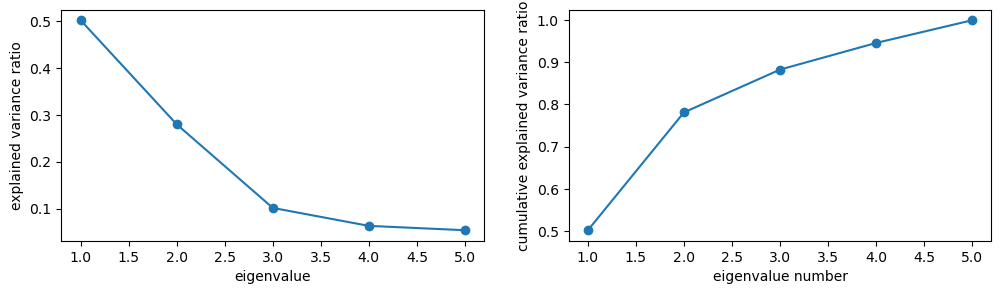

In [15]:
# Plot the results with the normlaized data
fig = plt.figure(figsize=(12, 3))

ax = fig.add_subplot(121)
ax.plot(np.arange(1,n_components_bet+1), evals_bet)
ax.scatter(np.arange(1,n_components_bet+1), evals_bet)
ax.set_xlabel("eigenvalue")
ax.set_ylabel("explained variance ratio")

#how much comulative information the eighenvalues give
ax = fig.add_subplot(122)
ax.plot(np.arange(1,n_components_bet+1), evals_bet.cumsum())
ax.scatter(np.arange(1,n_components_bet+1), evals_bet.cumsum())
ax.set_xlabel("eigenvalue number")
ax.set_ylabel("cumulative explained variance ratio")

plt.show()

In [16]:
#Compute PCA
np.random.seed(500)
nrows_2_bet = len(data_better)

n_components_2_bet = 2 #Do fit with 2 components
ind_2_bet = np.random.randint(len(data_better), size=nrows_2_bet)
pca_2_bet = PCA(n_components_2_bet, svd_solver='randomized')
pca_2_bet.fit_transform(data_better[ind_2_bet])

evals_2_bet = pca_2_bet.explained_variance_ratio_ 
print('Expained fractional variance of data encapsulated in the eigenvalues: \n' + str(evals_2_bet))

eigenvalues_2_bet = pca_2_bet.transform(data_better) #compute the eigenvalues for each of the samples
print('Eigenvalues:\n'+str(eigenvalues_2_bet[0:3]))
mean_2_bet = pca_2_bet.mean_ # mean of the data
print('Mean:\n'+str(mean_2_bet))
eigenvectors_2_bet = pca_2_bet.components_ #compute the eigenvectors for each of the samples
print('Eigenvectors:\n'+str(eigenvectors_2_bet[0:3]))

Expained fractional variance of data encapsulated in the eigenvalues: 
[0.5015943  0.27970458]
Eigenvalues:
[[-1.22046074 -1.53920869]
 [-1.24529648 -1.54745982]
 [-1.3632904  -1.60410575]]
Mean:
[ 0.02765232 -0.02567559  0.00573029  0.0218804  -0.029277  ]
Eigenvectors:
[[ 0.27168397  0.58359429  0.54290146 -0.52723733 -0.11350912]
 [ 0.59638944  0.03332226 -0.32510559 -0.14527388  0.7186175 ]]


In [17]:
#transpose the eigenvectors to have the right shape for scalar product
eigenvectors_T_2_better=np.transpose(eigenvectors_2_bet)
eigenvectors_T_2_better=np.array(eigenvectors_T_2_better, dtype=np.float64)

#projection coefficients
coeff_2_bet = np.dot(data_better, eigenvectors_T_2_better)

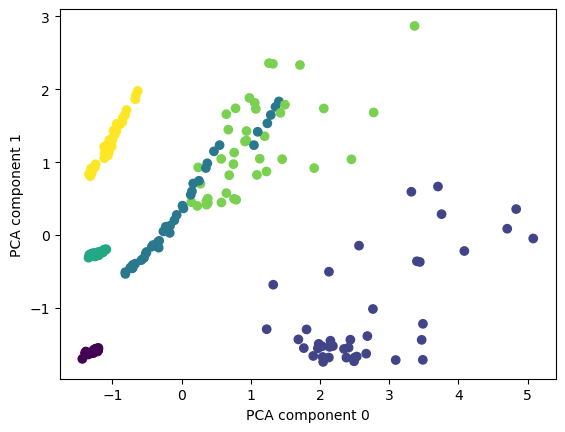

In [18]:
#plot for the 2 projection better data from PCA
plt.scatter(mean_2_bet[0] + coeff_2_bet[:,0], mean_2_bet[1] + coeff_2_bet[:,1], c=labels)
plt.xlabel('PCA component 0')
plt.ylabel('PCA component 1')
plt.show()